In [1]:
import pandas as pd
import sklearn as sl
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set()

# import data

In [2]:
titan = pd.read_csv('./../data/titanic/train.csv')

In [3]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titan.shape

(891, 12)

In [5]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# split test /train

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set = titan

In [8]:
test_set = pd.read_csv('./../data/titanic/test.csv')

train_set, test_set = train_test_split(titan,test_size = 0.2,random_state = 4)

In [9]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  making new attributes

from sklearn.base import BaseEstimator, TransformerMixin

#### example attribute adder test
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_optional_attr = False): # no *args or **kargs
        self.add_optional_attr = add_optional_attr
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        print(X.shape)
        #### cabin letter
        cabin_letter = X[:,1].apply(lambda x : str(x)[0])
        #rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        #population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_optional_attr:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        
        else:
            return np.c_[X]
        
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(train_set.values)

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_optional_attr = False): # no *args or **kargs
        self.add_optional_attr = add_optional_attr
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        #### cabin letter
        cabin_letter = X['Cabin'].apply(lambda x : str(x)[0])
        #rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        #population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_optional_attr:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

def new_vars_test_train(test,train):
    """function to make new variable in test and train set,
    also compares that there are the same possible entries in each"""
    for X in [test,train]:
        
    return
    

cabin letter

In [10]:
test_set['Cabin_letter'] = test_set['Cabin'].apply(lambda x : str(x)[0])
train_set['Cabin_letter'] = train_set['Cabin'].apply(lambda x : str(x)[0])

In [11]:
train_set['Cabin_letter'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
test_set['Cabin_letter'].unique()

array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

siblings

In [13]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_letter'],
      dtype='object')

In [14]:
train_set.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
train_set.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
for X in [train_set,test_set]:
    X['family_nos'] = X.Parch + X.SibSp
    X['family_flag'] = 0
    X.loc[X[X['family_nos'] > 0].index,'family_flag'] = 1

train_set['family_flag'] = 0
train_set.loc[train_set[train_set['family_nos'] > 0].index,'family_flag'] = 1

train_set[train_set['family_nos'] > 0].shape

train_set['family_flag'].value_counts()

train_set.family_nos.value_counts()

In [17]:
train_set.pivot_table(index=['Pclass'],columns=[])

,Age,Fare,Parch,PassengerId,SibSp,Survived,family_flag,family_nos
Pclass,,,,,,,,
1,38.233441,84.154687,0.356481,461.597222,0.416667,0.629630,0.495370,0.773148
2,29.877630,20.662183,0.380435,445.956522,0.402174,0.472826,0.434783,0.782609
3,25.140620,13.675550,0.393075,439.154786,0.615071,0.242363,0.340122,1.008147


In [18]:
train_set.shape

(891, 15)

In [19]:
test_set.shape

(418, 14)

In [20]:
train_set.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Cabin_letter      0
family_nos        0
family_flag       0
dtype: int64

In [21]:
train_set.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# investigate data

In [22]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_nos,family_flag
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.397306
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [23]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family_nos,family_flag
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713,0.394737
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072,0.489380
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000,1.000000


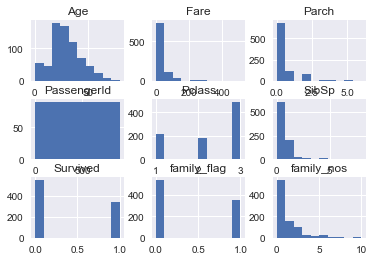

In [24]:
train_set.hist();

In [25]:
train_set.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Cabin_letter      0
family_nos        0
family_flag       0
dtype: int64

In [26]:
train_set.corr('pearson')['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
family_flag    0.203367
Parch          0.081629
family_nos     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Clean data

In [27]:
trainX = train_set.drop('Survived',axis=1)
trainY = train_set['Survived']

impuiting missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

trainX_num = trainX[['Fare','Age']].copy()

imputer.fit(trainX_num)

imputer.transform(trainX_num)

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
trainX_cat = trainX['Pclass']
encoder.fit_transform(trainX_cat)

from sklearn.preprocessing import OrdinalEncoder

trainX['Pclass'].reshape(-1, 1)

encoder = OrdinalEncoder()
trainX_cat = trainX['Pclass'].values.reshape(-1,1)
encoder.fit_transform(trainX_cat)

encoder = OneHotEncoder(sparse=False,categories='auto')
trainX_cat = trainX['Pclass'].values.reshape(-1,1)
encoder.fit_transform(trainX_cat)

encoder = LabelBinarizer()
trainX_cat = trainX['Sex']
encoder.fit_transform(trainX_cat)

Using a pipeline:

In [28]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [29]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

In [30]:
num_attribs = ['Age','Fare']
cat_attribs = ['Pclass']
bin_attribs = ['Sex']

num_attribs = ['Age','Fare','family_nos']
cat_attribs = ['Pclass']
bin_attribs = ['Sex']

num_attribs = ['Age','Fare']
cat_attribs = ['Pclass']
bin_attribs = ['Sex','family_flag']

num_attribs = ['Age','Fare','family_nos']
cat_attribs = ['Pclass','Cabin_letter']
bin_attribs = ['Sex']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False,categories='auto')),
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_attribs)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('label_encoder',OrdinalEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
   ('cat_pipeline',cat_pipeline),
   ('bin_pipeline',bin_pipeline) # there is some issue with this pipeline, unsure why.
])

cat_pipeline.fit_transform(trainX)

num_pipeline.fit_transform(trainX)

In [31]:
trainXt = full_pipeline.fit_transform(trainX)

In [32]:
trainXt.shape

(891, 16)

# Build basic model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

### evaulate the models on entire traiing set

In [34]:
from sklearn.metrics import f1_score

log_reg_pred = log_reg.predict(trainXt)
f1_score(log_reg_pred,trainY)

### cross validation scoring - how do models fair on the validation sets (CV)

In [35]:
from sklearn.model_selection import cross_val_score

scores_svm = cross_val_score(svm,trainXt,trainY,cv=10,scoring='f1')

In [36]:
def disp_scores(scores_list):
    #print(scores_list)
    print('CV score: {} (STD: {})'.format(np.mean(scores_list).round(3), np.std(scores_list).round(3)))
    #print('Mean: ', )
    #print('Std: ', np.std(scores_list).round(3))

disp_scores(scores_svm)

function for testing of models


num_attribs = ['Age','Fare']
cat_attribs = ['Pclass','Cabin_letter']
bin_attribs = ['Sex']
trainXt2 = full_pipeline.fit_transform(trainX)

In [37]:
svm1 = SVC(gamma='auto')
#svm2 = SVC(gamma='auto',kernel='linear')
#svm3 = SVC(gamma='auto',kernel='sigmoid')
svm4 = SVC(gamma='auto',kernel='poly')
ridge = RidgeClassifier(alpha=0.5)
rfor = RandomForestClassifier(n_estimators = 10)
adaB = AdaBoostClassifier()


models = [svm1,svm4,ridge,rfor,adaB]

def test_basic_model(model,Xdata,Ydata):
    """function to eval basic models"""
    #### print model info
    print(model)
    
    #### train and test on all data
    model.fit(Xdata,Ydata)
    model_pred = model.predict(Xdata)
    print('All train:' , f1_score(model_pred,Ydata).round(3) )
    
    #### cv training and testing
    scores_model = cross_val_score(model,Xdata,Ydata,cv=10,scoring='f1')
    disp_scores(scores_model)
    print()
    return

In [38]:
for i in models: # with family_nos + cabin_letter
    test_basic_model(i,trainXt,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.755
CV score: 0.739 (STD: 0.046)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.305
CV score: 0.227 (STD: 0.116)

RidgeClassifier(alpha=0.5, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
All train: 0.742
CV score: 0.733 (STD: 0.048)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_le

In [38]:
for i in models: # with binary family_flag
    test_basic_model(i,trainXt,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.742
CV score: 0.729 (STD: 0.05)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.739
CV score: 0.709 (STD: 0.058)

RidgeClassifier(alpha=0.5, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
All train: 0.717
CV score: 0.712 (STD: 0.052)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_lea

In [38]:
for i in models: # with family_nos
    test_basic_model(i,trainXt,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.761
CV score: 0.752 (STD: 0.05)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.762
CV score: 0.752 (STD: 0.052)

RidgeClassifier(alpha=0.5, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
All train: 0.722
CV score: 0.719 (STD: 0.05)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf

In [40]:
for i in models: # basic vars
    test_basic_model(i,trainXt,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.735
CV score: 0.735 (STD: 0.056)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.71
CV score: 0.708 (STD: 0.049)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.691
CV score: 0.668 (STD: 0.06)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=Non

NOTE: random forest model score is much lower on the Validation sets than the training set - > overfitting! 

Possible solutions:
- simplify model
- constrain model (regularise it)
- get more training data

# grid seraching for best models

rforest and SVM look interesting...lets try those only.

In [40]:
from sklearn.model_selection import GridSearchCV

#### RF

param_grid = [
    {'n_estimators':[10,30,60,90,150],'max_features':[2,4,6]},
    {'bootstrap':[False],'n_estimators':[30,60,90,150],'max_features':[2,4,6]}
]

rfor = RandomForestClassifier()

grid_search = GridSearchCV(rfor,param_grid,cv=10,scoring='accuracy',return_train_score=True)

grid_search.fit(trainXt,trainY)

grid_search.best_params_

cvres = grid_search.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

grid_search.best_estimator_.feature_importances_

grid_search.best_estimator_.feature_importances_

num_attribs

full_pipeline.get_feature_names

#### SVM

In [51]:
param_grid = [
    {'C':[1,3,4,5,6,7,10,20,40,80],'kernel':['rbf'],'gamma':['auto']},
    #{'C':[1,10,80,100,200,500],'kernel':['rbf'],'gamma':['auto']}
]

SVM = SVC()

grid_search_SVM = GridSearchCV(SVM,param_grid,cv=10,scoring='f1',return_train_score=True)

grid_search_SVM.fit(trainXt,trainY)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 3, 4, 5, 6, 7, 10, 20, 40, 80], 'kernel': ['rbf'], 'gamma': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [52]:
cvres = grid_search_SVM.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

0.739 0.754 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.756 0.766 {'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}
0.756 0.769 {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}
0.761 0.773 {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
0.759 0.775 {'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}
0.759 0.777 {'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}
0.757 0.783 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.757 0.789 {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'}
0.747 0.794 {'C': 40, 'gamma': 'auto', 'kernel': 'rbf'}
0.752 0.807 {'C': 80, 'gamma': 'auto', 'kernel': 'rbf'}


In [53]:
grid_search_SVM.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## ada Boost

In [60]:
param_grid = [
    {'n_estimators':[1,10,30,35],'learning_rate':[1]},
    #{'C':[1,10,80,100,200,500],'kernel':['rbf'],'gamma':['auto']}
]

adaB = AdaBoostClassifier()

grid_search_adaB = GridSearchCV(adaB,param_grid,cv=10,scoring='accuracy',return_train_score=True)

grid_search_adaB.fit(trainXt,trainY)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [1, 10, 30, 35], 'learning_rate': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [61]:
cvres = grid_search_adaB.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

0.787 0.787 {'learning_rate': 1, 'n_estimators': 1}
0.805 0.823 {'learning_rate': 1, 'n_estimators': 10}
0.816 0.831 {'learning_rate': 1, 'n_estimators': 30}
0.818 0.833 {'learning_rate': 1, 'n_estimators': 35}


In [62]:
grid_search_adaB.best_params_

{'learning_rate': 1, 'n_estimators': 35}

# eval on test set

Adaboost

In [63]:
testXt = full_pipeline.transform(test_set)

In [64]:
pred_adaB = grid_search_adaB.best_estimator_.predict(testXt)

In [74]:
adaB_results = pd.DataFrame(pred_adaB,test_set['PassengerId'],columns=['Survived'])

In [66]:
adaB_results.sum()/adaB_results.shape[0]

Survived    0.380383
dtype: float64

In [67]:
adaB_results.to_csv('./adaB_results_v2.csv')

conclusions:

- original SVM still has best performance on Kaggle. 
- adding in features has only improved prediction slightly.
- AdaB seems to look more promising but then has a big loss of performance on the test set.
- 

Future thinkging:
- must figure out pipelines for feature gerneation and model searching
- adding more complex features may be useful, but will only know when testing them.
- some models seems to reducce in performance with additional features, for example cabin number (many catagories, seemed to favour Ridge regression and not the SVMs).
- After an initial model, it seems difficult to increase performance.
- Look at balancing CV groups.
- propper imputation may be useful? 

#### SVM - choosing svm as seems more stable (smaller loss between train/validation sets)

result on Kaggle: suprising, higher accuracy on kaggle.

In [68]:
pred_SVM = grid_search_SVM.best_estimator_.predict(testXt)

In [69]:
SVM_results = pd.DataFrame(pred_SVM,test_set['PassengerId'],columns=['Survived'])

In [70]:
SVM_results.to_csv('./SVM_results_v2.csv')

In [71]:
SVM_results.sum()/SVM_results.shape[0]

Survived    0.366029
dtype: float64

In [72]:
break

SyntaxError: 'break' outside loop (<ipython-input-72-6aaf1f276005>, line 1)

In [107]:
trainY.sum()/trainY.shape

array([0.38383838])

In [94]:
pred_RF = grid_search.best_estimator_.predict(testXt)

In [95]:
RF_results = pd.DataFrame(pred_RF,test_set['PassengerId'],columns=['Survived'])

In [101]:
RF_results.to_csv('./RF_results.csv')

In [99]:
RF_results.sum()/SVM_results.shape[0]

Survived    0.354067
dtype: float64

In [100]:
trainY.sum()/trainY.shape

array([0.38383838])

dev

In [86]:
break

SyntaxError: 'break' outside loop (<ipython-input-86-6aaf1f276005>, line 1)

In [86]:
testX = test_set.drop('Survived',axis=1)
testY = test_set['Survived']

In [89]:
testXt = full_pipeline.transform(testX)

In [95]:

def eval_final_model(testY,testX,final_model):


    final_pred = final_model.predict(testX)
    print(final_model.estimator)
    print(f1_score(testY,final_pred))
    print()
    return

models = [grid_search_SVM,grid_search]

for i in models:
    eval_final_model(testY,testXt,i)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.7339449541284403

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7652173913043478



# ROC curve

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
rfor_predCV = cross_val_predict(rfor,trainXt,trainY,cv=10)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr , thresholds = roc_curve(trainY,rfor_predCV)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)

In [ ]:
plot_roc_curve(fpr,tpr)

In [ ]:
thresholds

# Dev

In [ ]:
break

In [ ]:
train_num = train.drop()

In [ ]:
train.columns

In [ ]:
y_var = ['Survived']
x_var = ['Pclass','Embarked','Sex','SibSp','Parch']

y = train[y_var]
X = train[x_var]

In [ ]:
X.describe()

In [ ]:
X.hist()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LabelEncoder()

In [ ]:
train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)






print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

In [ ]:
from sklearn.preprocessing import CategoricalEncoder
cat = CategoricalEncoder()

X = np.array([['a', 'b', 'a', 'c'], [0, 1, 0, 1]], dtype=object).T

cat.fit_transform(X).toarray()

In [ ]:
skl.preprocessing.